# 4.10 IC Coding Etiquette & Excel Reporting

## The script below contains the following:

1. Import libraries
2. Import dataframes and check the dimensions
3. Create suitable charts to illustrate the results
4. Export the visualization and dataset

## 1. Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Import dataframe and check the dimensions

In [2]:
os.getcwd().find('03 Scripts')

104

In [3]:
os.getcwd()[0:os.getcwd().find('03 Scripts')]

'C:\\Users\\babum\\Desktop\\CF_Data Analytics\\Data Immersion\\Achievement 4\\02-2023 Instacart Basket Analysis\\'

In [4]:
# Create path variable to import dataframe

path = r'C:\Users\babum\Desktop\CF_Data Analytics\Data Immersion\Achievement 4\02-2023 Instacart Basket Analysis'
path = os.getcwd()[0:os.getcwd().find('03 Scripts')]

In [5]:
path

'C:\\Users\\babum\\Desktop\\CF_Data Analytics\\Data Immersion\\Achievement 4\\02-2023 Instacart Basket Analysis\\'

In [6]:
# Import dataframe

df_high = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Small_sample_high_activity_customer.pkl'))

In [7]:
df_dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'departments_wrangled.csv'),index_col = [0])

In [8]:
# Check the dimensions

df_high.shape

(9286994, 42)

In [9]:
df_high.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,exclusion_flag,age_flag,income_flag,profile_pets,profile_meat_eaters,profile_alcohol_consumers,profile_babies,profile_shopping_time,profile_fam,department_name
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,High-activity customers,Senior citizen,Low income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Morning peak hour shopper,Married with no dependants,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,High-activity customers,Senior citizen,High income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Evening shopper,Married with dependants,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,High-activity customers,Middle-aged,Low income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Odd hour shopper,Married with dependants,snacks
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,High-activity customers,Senior citizen,High income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Evening shopper,Married with no dependants,snacks
12,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,1480,38,4,13,...,High-activity customers,Young,Low income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Morning peak hour shopper,Parents/siblings with dependants,snacks


In [10]:
df_high.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_prior_order', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'num_of_dependants',
       'family_status', 'income', '_merge', 'region', 'exclusion_flag',
       'age_flag', 'income_flag', 'profile_pets', 'profile_meat_eaters',
       'profile_alcohol_consumers', 'profile_babies', 'profile_shopping_time',
       'profile_fam', 'department_name'],
      dtype='object')

## 3. Create visualization to show the distribution of profiles

### Visualization based on days

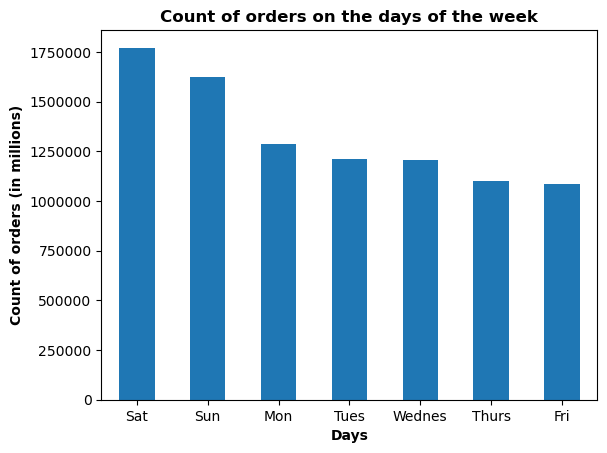

In [45]:
# Create bar chart for order_day_of_week

g1 = df_high['orders_day_of_week'].value_counts().plot.bar(rot = 0);
plt.title('Count of orders on the days of the week', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);

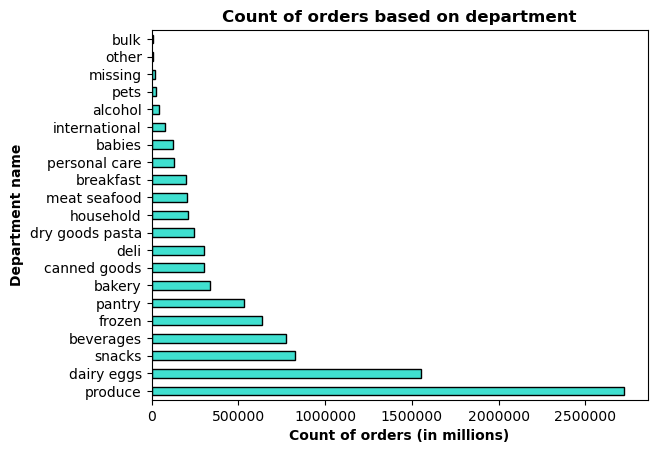

In [46]:
# Create bar chart for department

g2 = df_high['department_name'].value_counts().plot.barh(rot = 0, color = 'turquoise', edgecolor = 'black');
plt.title('Count of orders based on department', fontweight = 'bold');
plt.xlabel('Count of orders (in millions)', fontweight = 'bold');
plt.ylabel ('Department name', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));

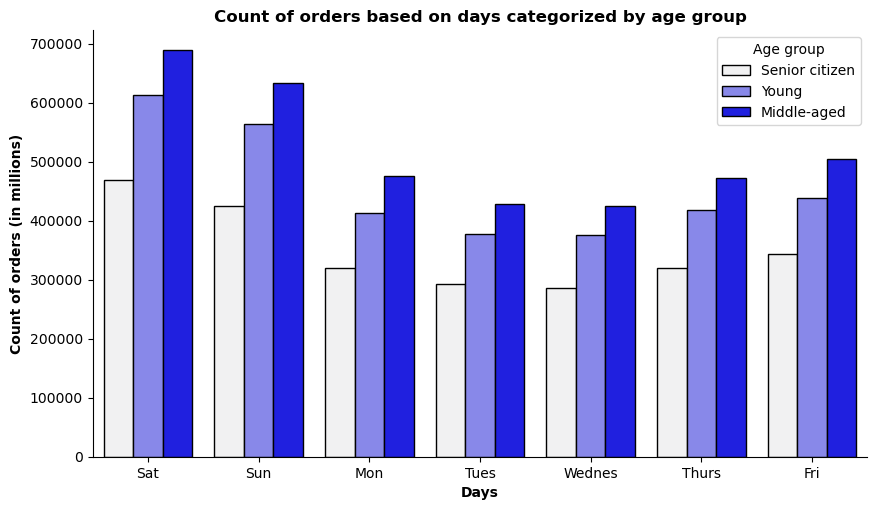

In [13]:
# Creating bar plot of days categorized by age group

g3 = sns.catplot(data = df_high, kind = 'count', x = 'orders_day_of_week', ci = False, hue = 'age_flag', hue_order = df_high['age_flag'].value_counts().sort_values().index, color = 'blue', edgecolor = 'black', legend = False)
plt.title('Count of orders based on days categorized by age group', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Age group');
g3.fig.set_figwidth(10);


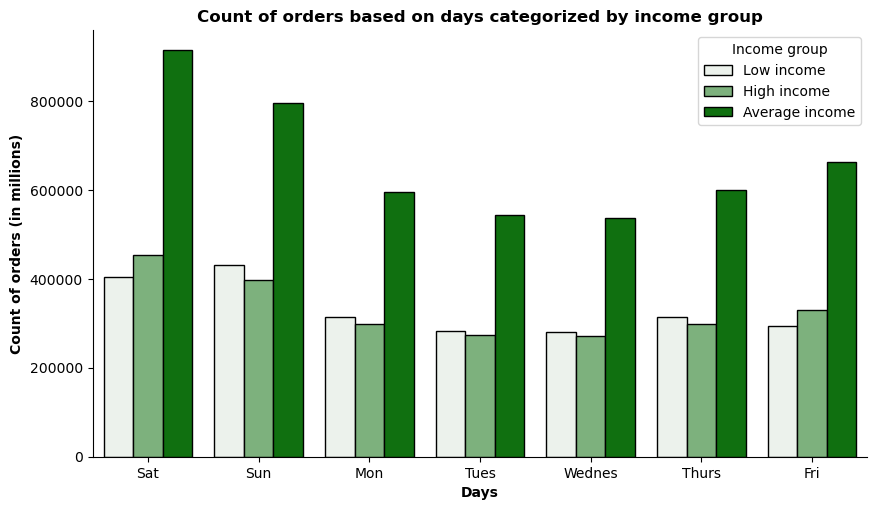

In [14]:
# Creating bar plot of days categorized by income group

g4 = sns.catplot(data = df_high, kind = 'count', x = 'orders_day_of_week', ci = False, hue = 'income_flag', hue_order = df_high['income_flag'].value_counts().sort_values().index, color = 'green', edgecolor = 'black', legend = False);
plt.title('Count of orders based on days categorized by income group', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Income group');
g4.fig.set_figwidth(10);

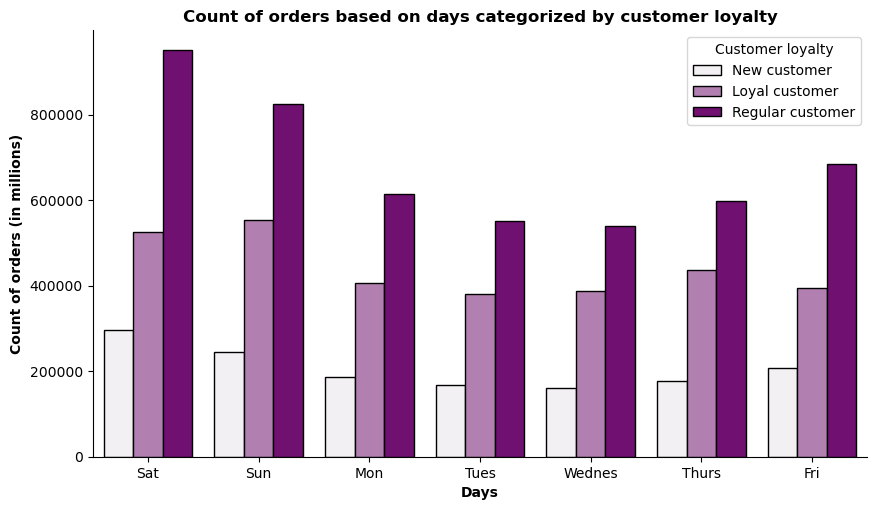

In [15]:
# Creating bar plot of days categorized by customer loyalty

g5 = sns.catplot(data = df_high, kind = 'count', x = 'orders_day_of_week', ci = False, hue = 'loyalty_flag', hue_order = df_high['loyalty_flag'].value_counts().sort_values().index, color = 'purple', edgecolor = 'black', legend = False)
plt.title('Count of orders based on days categorized by customer loyalty', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Customer loyalty');
g5.fig.set_figwidth(10);

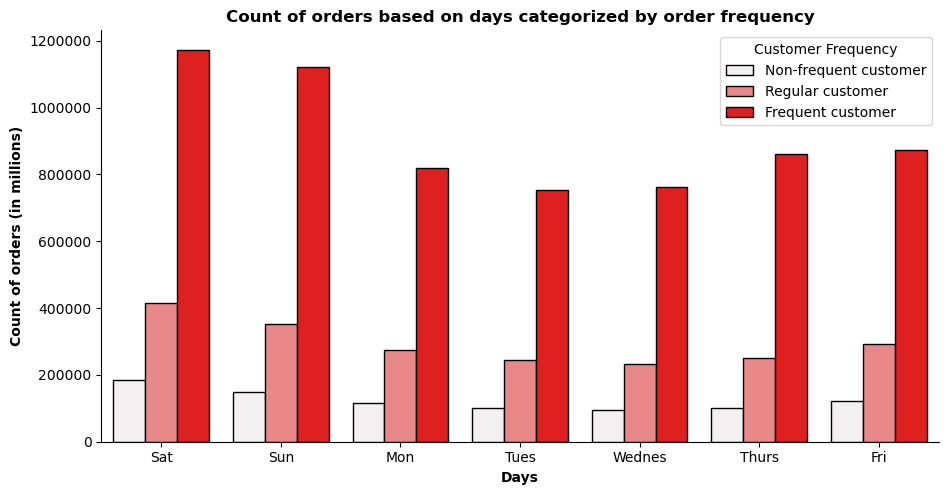

In [16]:
# Creating bar plot of days categorized by order_freq_flag

g6 = sns.catplot(data = df_high, kind = 'count', x = 'orders_day_of_week', ci = False, hue = 'order_frequency_flag', hue_order = df_high['order_frequency_flag'].value_counts().sort_values().index, color = 'red', edgecolor = 'black', legend = False)
plt.title('Count of orders based on days categorized by order frequency', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Customer Frequency');
g6.fig.set_figwidth(10);

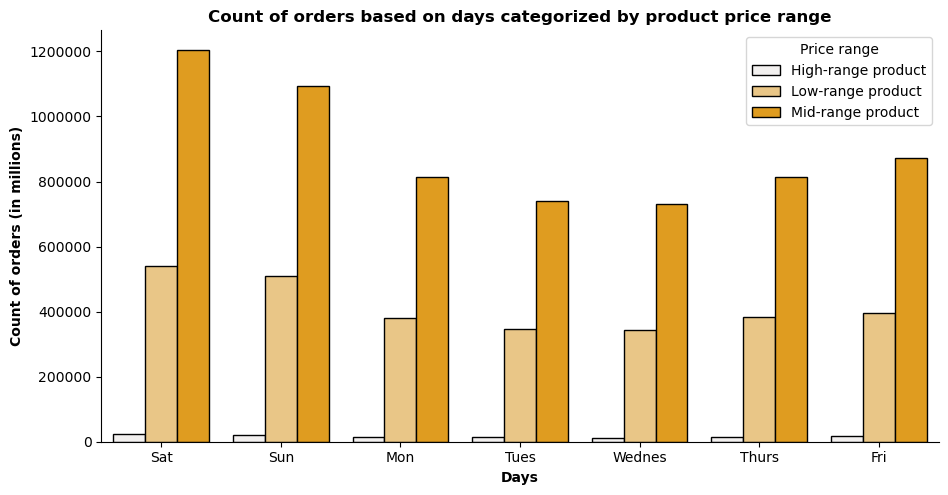

In [17]:
# Creating bar plot of days categorized by price range

g7 = sns.catplot(data = df_high, kind = 'count', x = 'orders_day_of_week', ci = False, hue = 'price_range_loc', hue_order = df_high['price_range_loc'].value_counts().sort_values().index, color = 'orange', edgecolor = 'black', legend = False)
plt.title('Count of orders based on days categorized by product price range', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Price range');
g7.fig.set_figwidth(10);

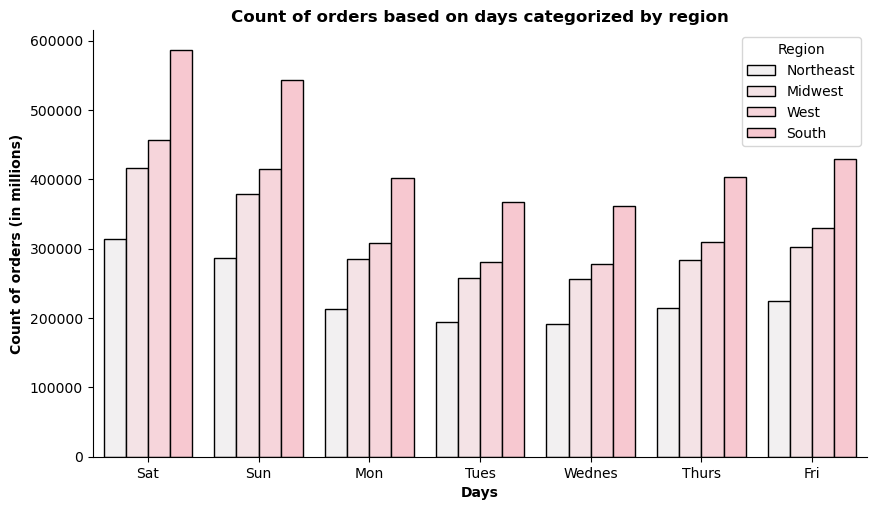

In [18]:
# Creating bar plot of days categorized by region

g8 = sns.catplot(data = df_high, kind = 'count', x = 'orders_day_of_week', ci = False, hue = 'region', hue_order = df_high['region'].value_counts().sort_values().index, color = 'pink', edgecolor = 'black', legend = False)
plt.title('Count of orders based on days categorized by region', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Region');
g8.fig.set_figwidth(10);

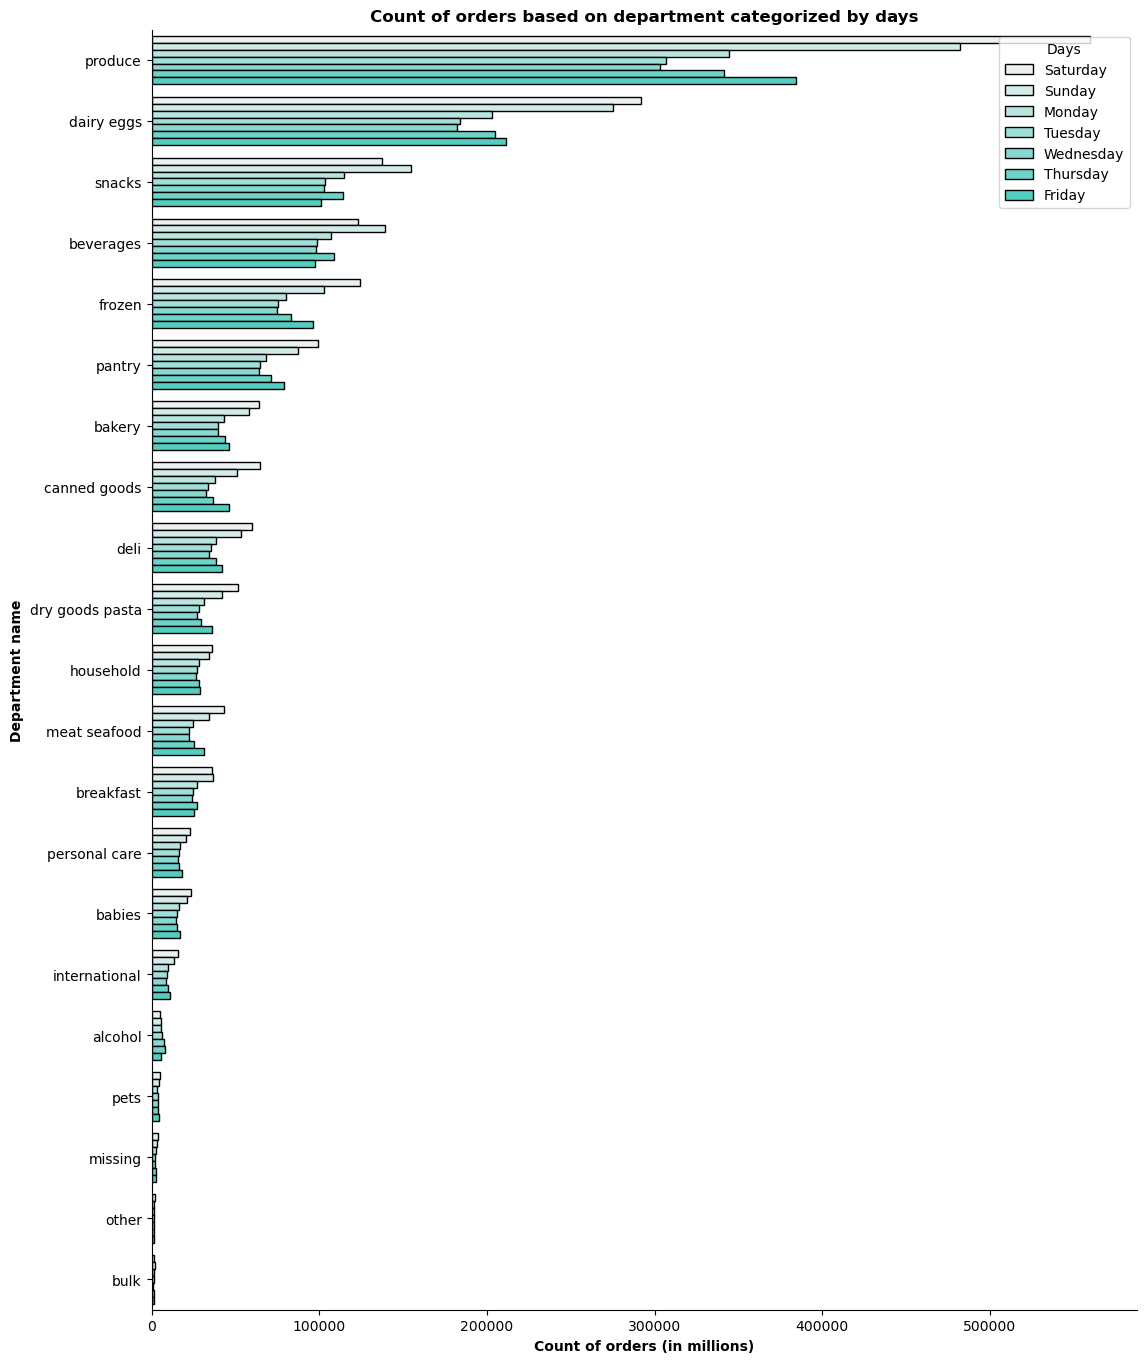

In [19]:
# Creating bar plot of days categorized by department

g9 = sns.catplot(data = df_high, kind = 'count', y = 'department_name', order = df_high['department_name'].value_counts().index,ci = False, orient = 'h', hue = 'orders_day_of_week',color = 'turquoise', edgecolor = 'black', legend = False)
plt.title('Count of orders based on department categorized by days', fontweight = 'bold');
plt.ylabel('Department name', fontweight = 'bold');
plt.xlabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.legend(title = 'Days', loc = 'upper right', labels = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']);
g9.fig.set_figwidth(15);
g9.fig.set_figheight(15);

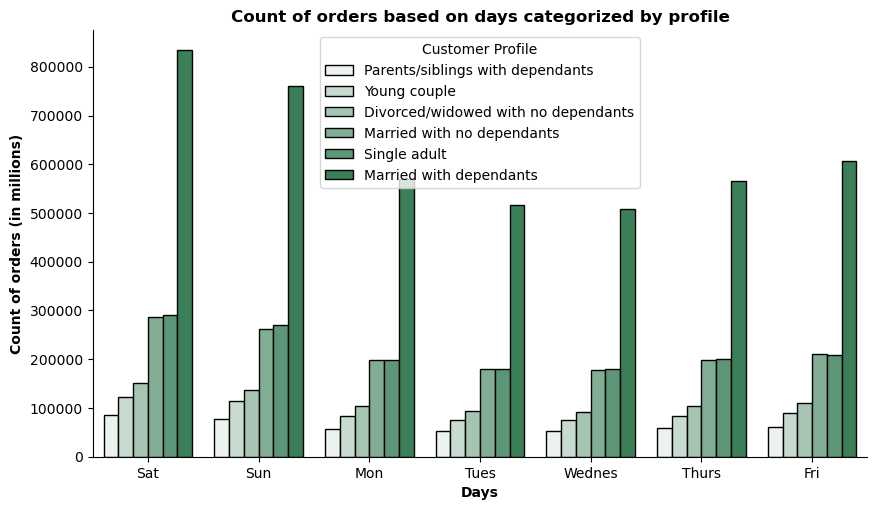

In [20]:
# Creating bar plot of days categorized by customer profile

g10 = sns.catplot(data = df_high, kind = 'count', x = 'orders_day_of_week', ci = False, hue = 'profile_fam', hue_order = df_high['profile_fam'].value_counts().sort_values().index, color = 'seagreen', edgecolor = 'black', legend = False)
plt.title('Count of orders based on days categorized by profile', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Customer Profile');
g10.fig.set_figwidth(10);

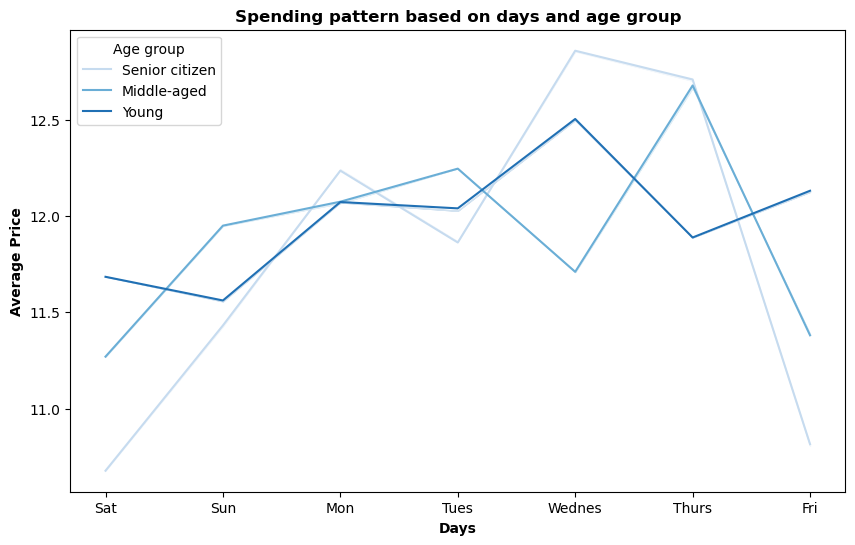

In [21]:
# Creating line chart on avg_price, age flag and order day of week
plt.figure(figsize = (10,6))
g11 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'age_flag', data = df_high, ci = False, palette = 'Blues')
plt.title('Spending pattern based on days and age group', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Age group');

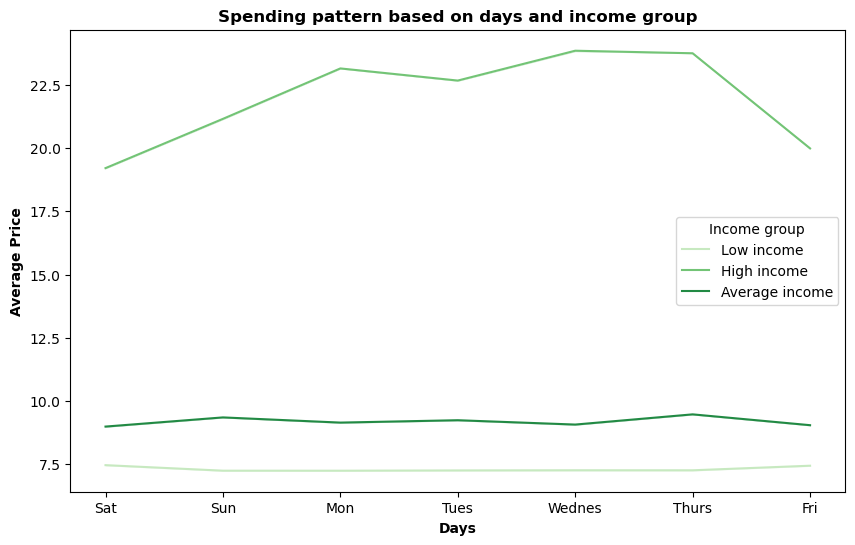

In [22]:
# Creating line chart on avg_price, income flag and order day of week
plt.figure(figsize = (10,6))
g12 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'income_flag', data = df_high, ci = False, palette = 'Greens')
plt.title('Spending pattern based on days and income group', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Income group');

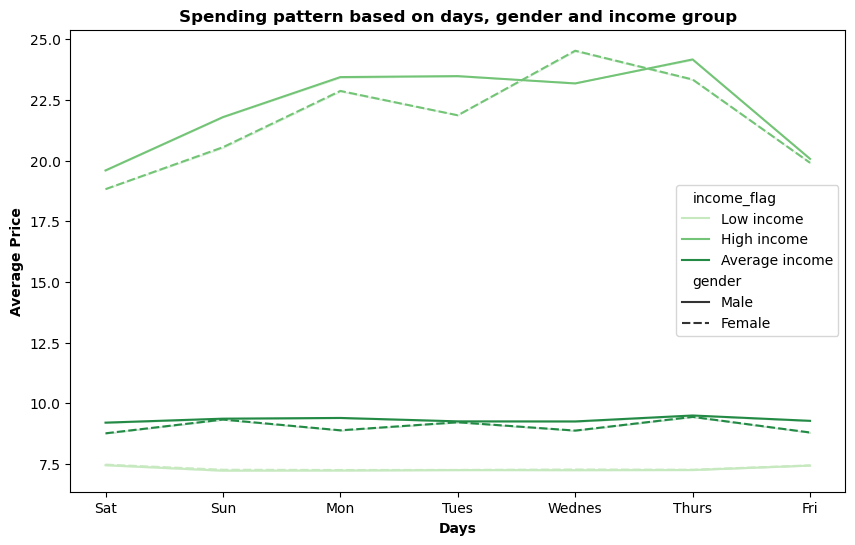

In [23]:
# Creating line chart on avg_price, income flag, gender and order day of week
plt.figure(figsize = (10,6))
g13 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'income_flag', style = 'gender', data = df_high, ci = False, palette = 'Greens')
plt.title('Spending pattern based on days, gender and income group', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);

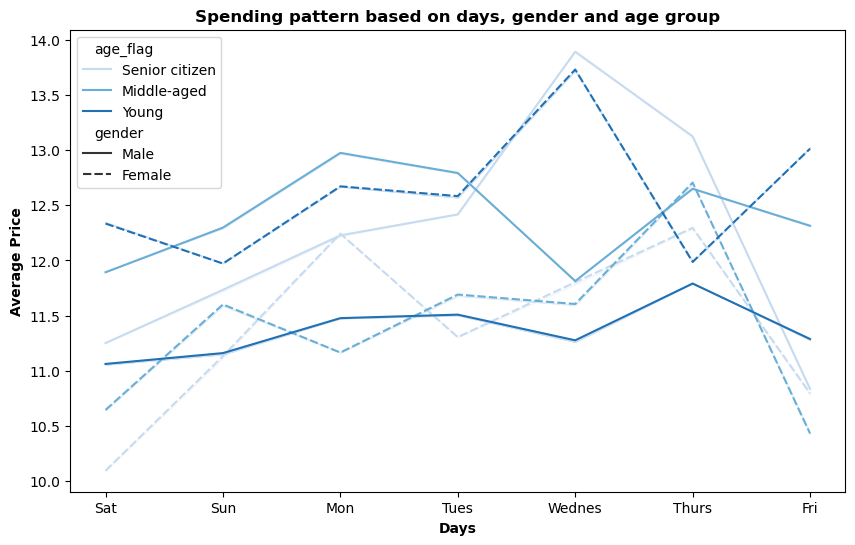

In [24]:
# Creating line chart on avg_price, age flag, gender and order day of week
plt.figure(figsize = (10,6))
g14 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'age_flag', style = 'gender', data = df_high, ci = False, palette = 'Blues');
plt.title('Spending pattern based on days, gender and age group', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);

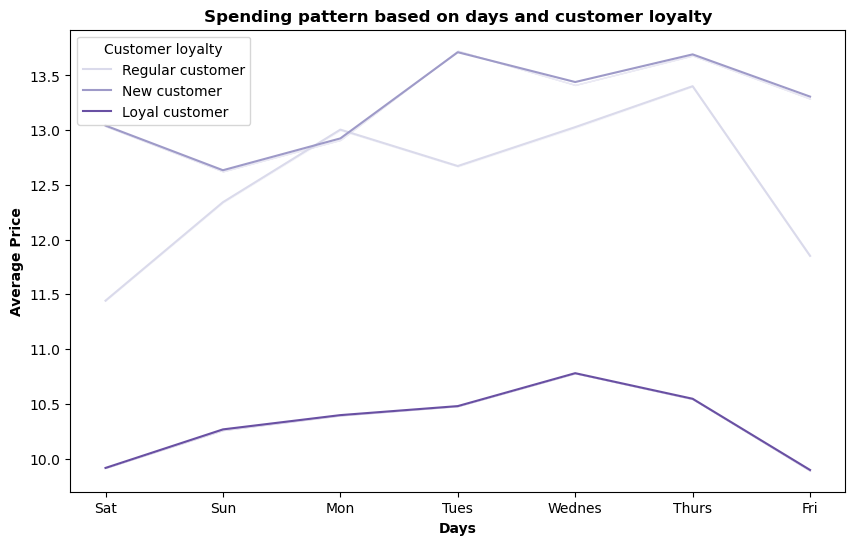

In [25]:
# Creating line chart on avg_price, loyalty flag and order day of week
plt.figure(figsize = (10,6))
g15 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'loyalty_flag', data = df_high, ci = False, palette = 'Purples')
plt.title('Spending pattern based on days and customer loyalty', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Customer loyalty');

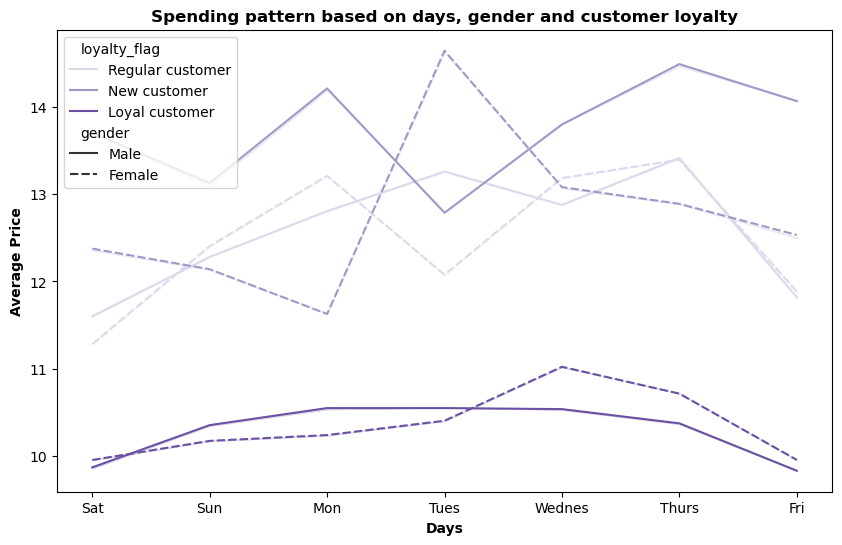

In [26]:
# Creating line chart on avg_price, gender, loyalty flag and order day of week
plt.figure(figsize = (10,6))
g16 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'loyalty_flag', style = 'gender', data = df_high, ci = False, palette = 'Purples')
plt.title('Spending pattern based on days, gender and customer loyalty', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);

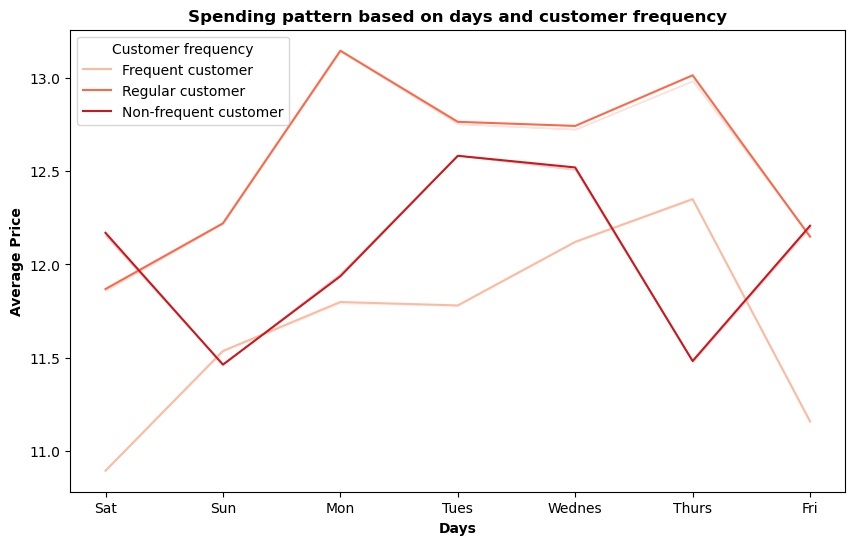

In [27]:
# Creating line chart on avg_price, order freq flag and order day of week
plt.figure(figsize = (10,6))
g17 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'order_frequency_flag', data = df_high, ci = False, palette = 'Reds')
plt.title('Spending pattern based on days and customer frequency', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Customer frequency');

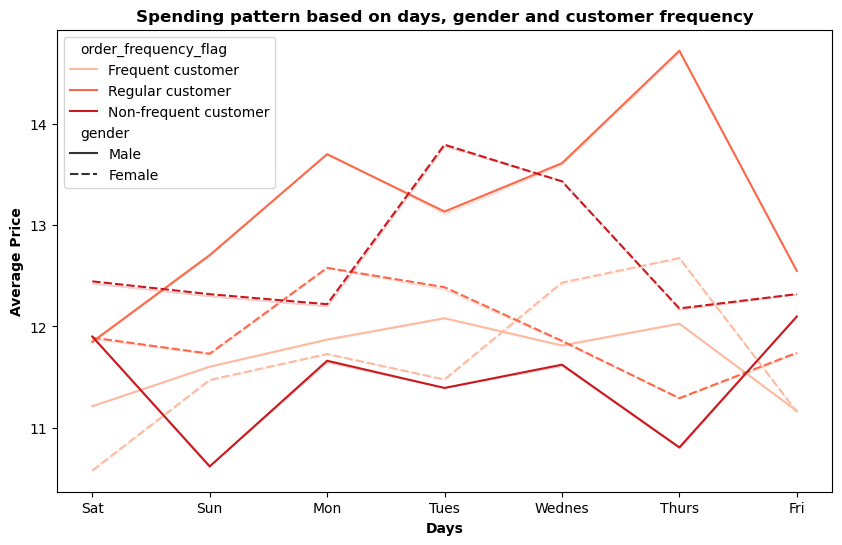

In [28]:
# Creating line chart on avg_price, gender, order freq flag and order day of week
plt.figure(figsize = (10,6))
g18 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'order_frequency_flag', style = 'gender', data = df_high, ci = False, palette = 'Reds')
plt.title('Spending pattern based on days, gender and customer frequency', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);

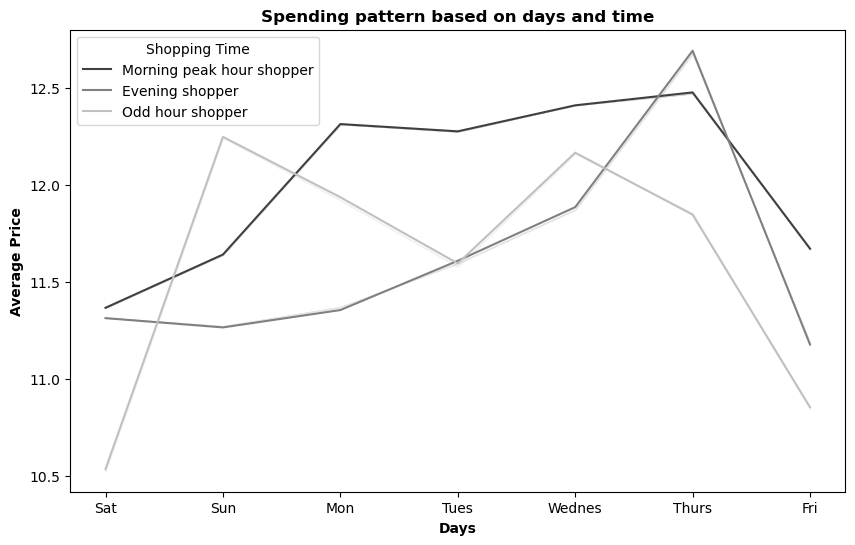

In [29]:
# Creating line chart on avg_price, shopping time and order day of week
plt.figure(figsize = (10,6))
g19 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'profile_shopping_time', data = df_high, ci = False, palette = 'gray')
plt.title('Spending pattern based on days and time', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Shopping Time');

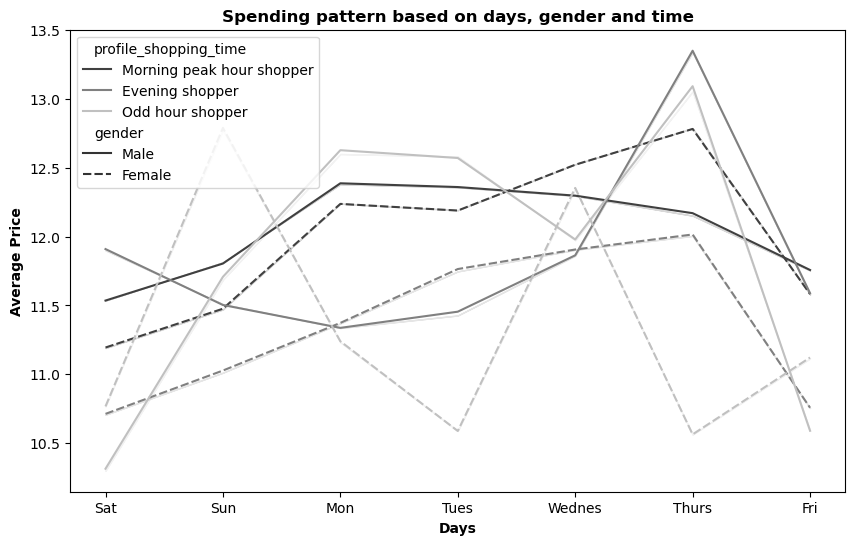

In [30]:
# Creating line chart on avg_price, gender, shopping time and order day of week
plt.figure(figsize = (10,6))
g20 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'profile_shopping_time', style = 'gender', data = df_high, ci = False, palette = 'gray')
plt.title('Spending pattern based on days, gender and time', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);

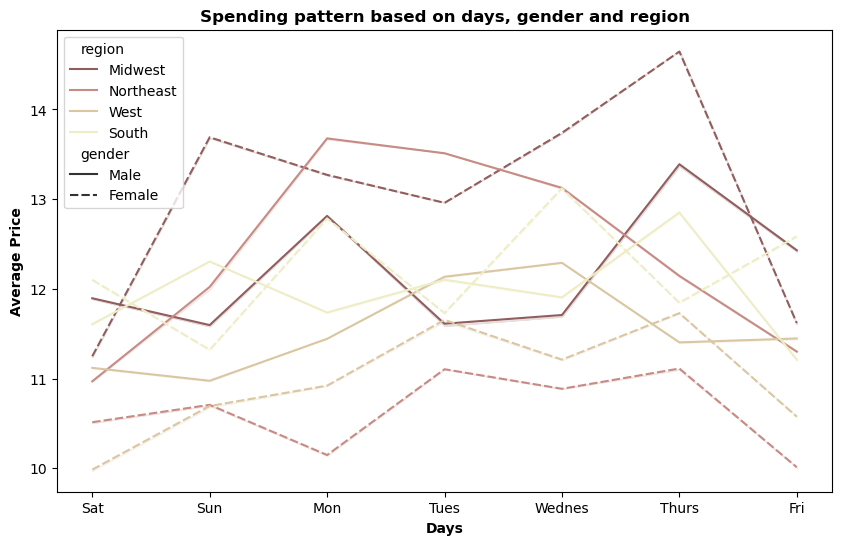

In [31]:
# Creating line chart on avg_price, gender, region and order day of week
plt.figure(figsize = (10,6))
g21 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'region', style = 'gender', data = df_high, ci = False, palette = 'pink')
plt.title('Spending pattern based on days, gender and region', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);

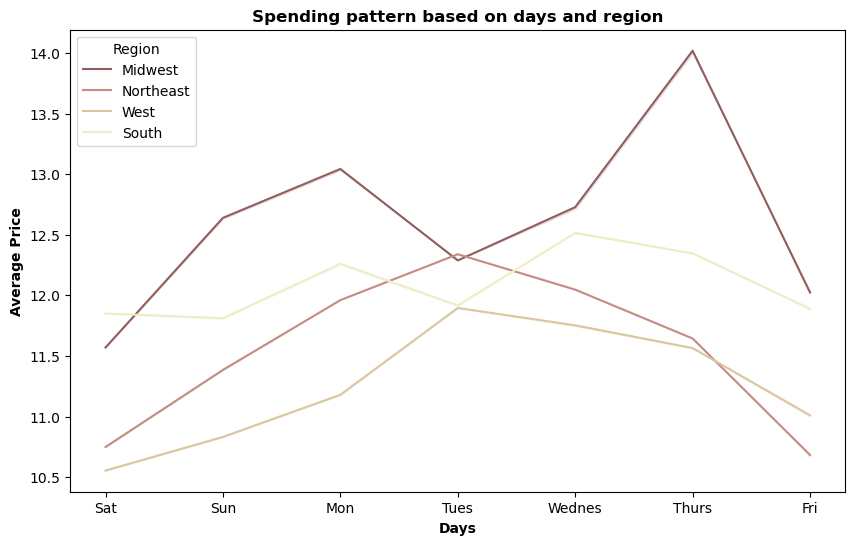

In [32]:
# Creating line chart on avg_price, region and order day of week
plt.figure(figsize = (10,6))
g22 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'region', data = df_high, ci = False, palette = 'pink')
plt.title('Spending pattern based on days and region', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Region');

<Figure size 1000x600 with 0 Axes>

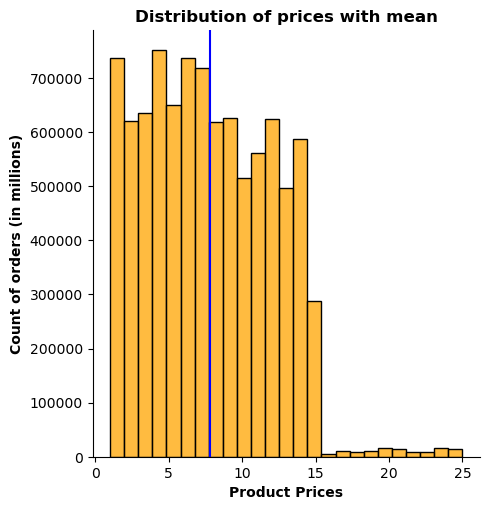

In [33]:
# Creating ditribution of prices with mean

plt.figure(figsize = (10,6));
g23 = sns.displot(df_high, x = 'prices', bins = 25, color = 'orange');

#Calculating the mean
mean = df_high['prices'].mean();

#Plotting the mean
plt.axvline(mean, 0,1, color = 'blue');

plt.title('Distribution of prices with mean', fontweight = 'bold');
plt.xlabel('Product Prices', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');

<Figure size 1000x600 with 0 Axes>

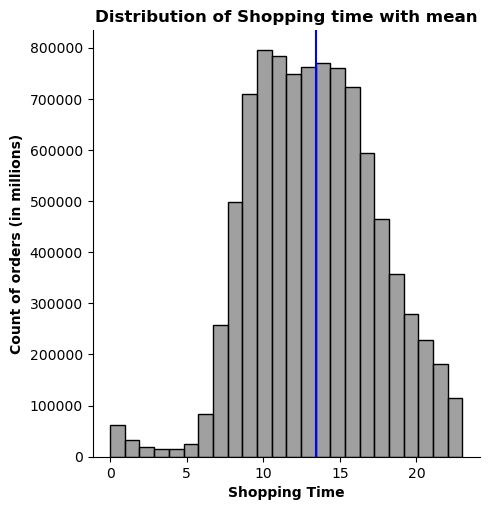

In [34]:
# Creating ditribution of shopping time with mean

plt.figure(figsize = (10,6));
g24 = sns.displot(df_high, x = 'order_hour_of_day', bins = 24, color = 'gray');

#Calculating the mean
mean = df_high['order_hour_of_day'].mean();

#Plotting the mean
plt.axvline(mean, 0,1, color = 'blue');

plt.title('Distribution of Shopping time with mean', fontweight = 'bold');
plt.xlabel('Shopping Time', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');

<Figure size 1000x600 with 0 Axes>

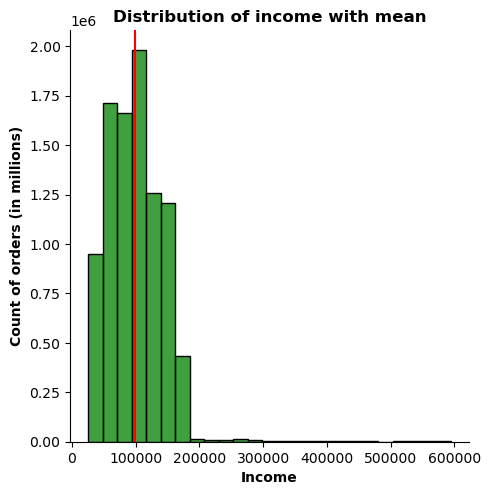

In [35]:
# Creating ditribution of income with mean

plt.figure(figsize = (10,6));
g26 = sns.displot(df_high, x = 'income', bins = 25, color = 'green');

#Calculating the mean
mean = df_high['income'].mean();

#Plotting the mean
plt.axvline(mean, 0,1, color = 'red');

plt.title('Distribution of income with mean', fontweight = 'bold');
plt.xlabel('Income', fontweight = 'bold');
plt.ylabel ('Count of orders (in millions)', fontweight = 'bold');

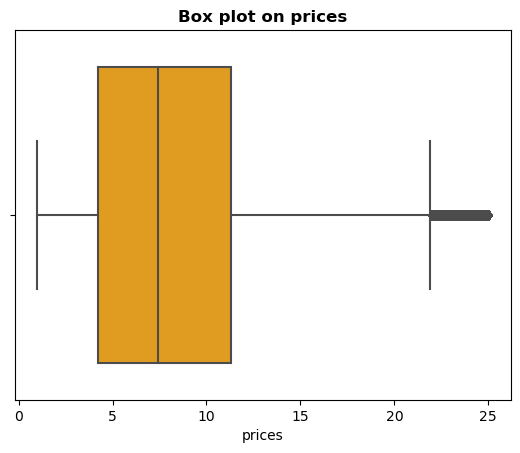

In [36]:
# Creating ditribution of prices

g27 = sns.boxplot(x = 'prices', data = df_high, color = 'orange');
plt.title('Box plot on prices', fontweight = 'bold');

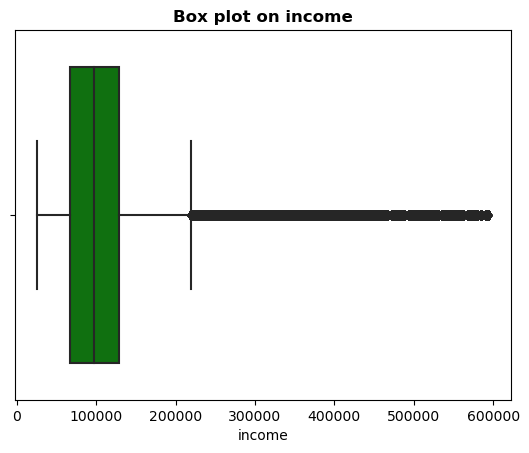

In [37]:
# Creating ditribution of income

g28 = sns.boxplot(x = 'income', data = df_high, color = 'green');
plt.title('Box plot on income', fontweight = 'bold');

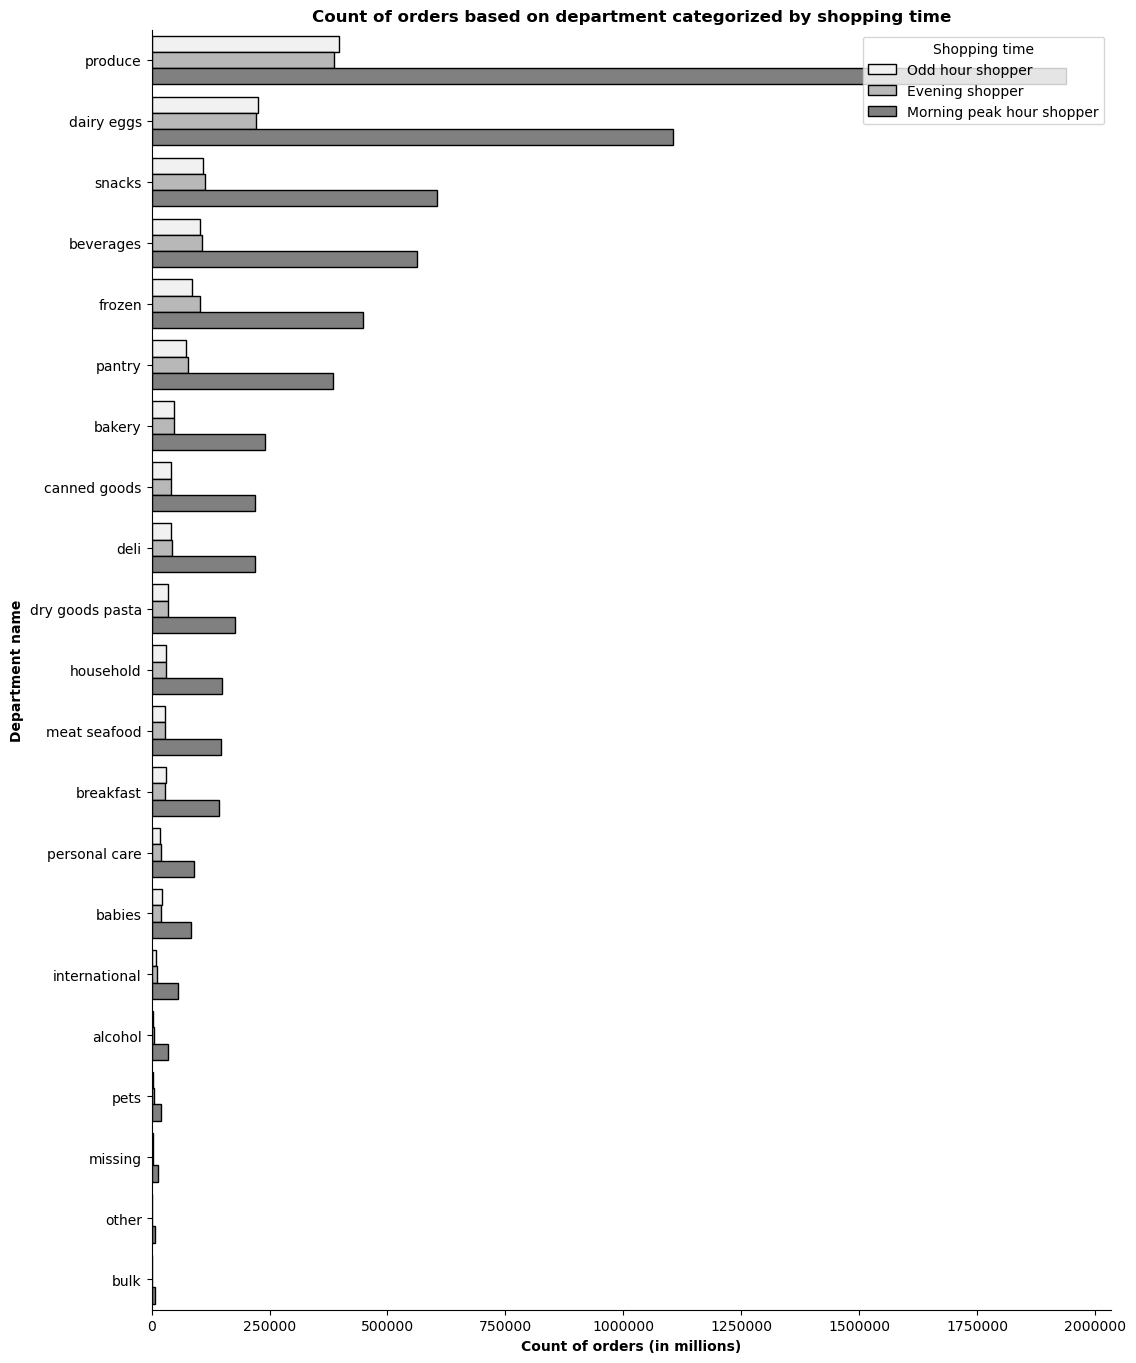

In [38]:
# Creating bar plot of department categorized by shopping time

g29 = sns.catplot(data = df_high, kind = 'count', y = 'department_name', order = df_high['department_name'].value_counts().index,ci = False, orient = 'h', hue = 'profile_shopping_time',hue_order = df_high['profile_shopping_time'].value_counts().sort_values().index,color = 'grey', edgecolor = 'black', legend = False)
plt.title('Count of orders based on department categorized by shopping time', fontweight = 'bold');
plt.ylabel('Department name', fontweight = 'bold');
plt.xlabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.legend(title = 'Shopping time', loc = 'upper right');
g29.fig.set_figwidth(15);
g29.fig.set_figheight(15);

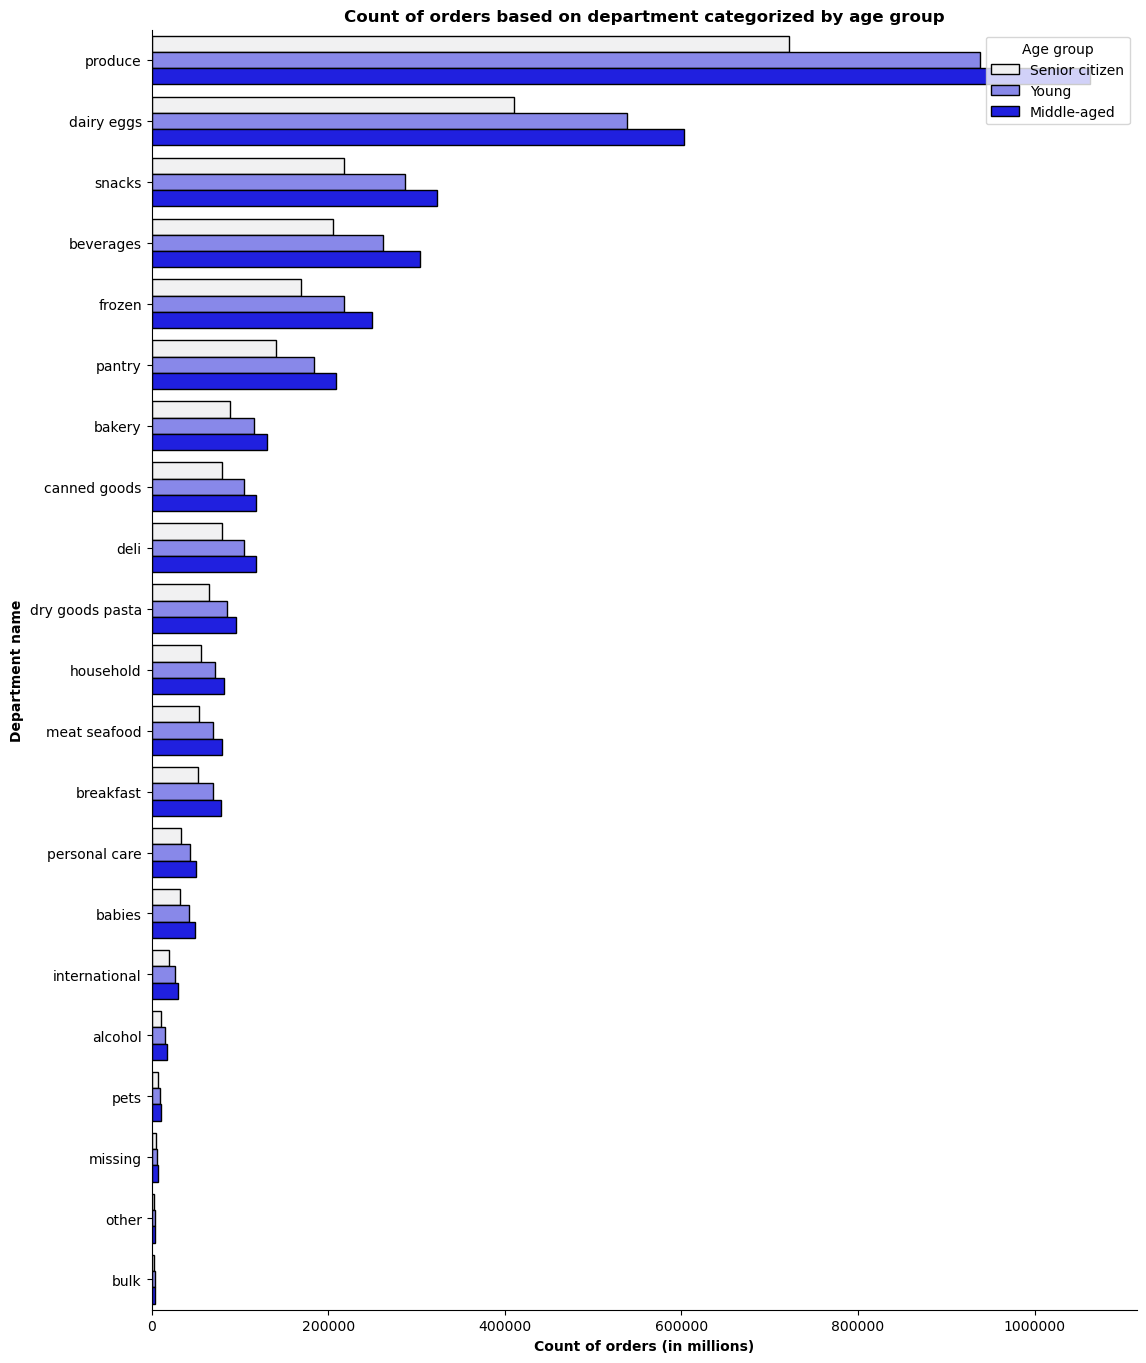

In [39]:
# Creating bar plot of department categorized by age group

g30 = sns.catplot(data = df_high, kind = 'count', y = 'department_name', order = df_high['department_name'].value_counts().index,ci = False, orient = 'h', hue = 'age_flag',hue_order = df_high['age_flag'].value_counts().sort_values().index,color = 'blue', edgecolor = 'black', legend = False)
plt.title('Count of orders based on department categorized by age group', fontweight = 'bold');
plt.ylabel('Department name', fontweight = 'bold');
plt.xlabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.legend(title = 'Age group', loc = 'upper right');
g30.fig.set_figwidth(15);
g30.fig.set_figheight(15);

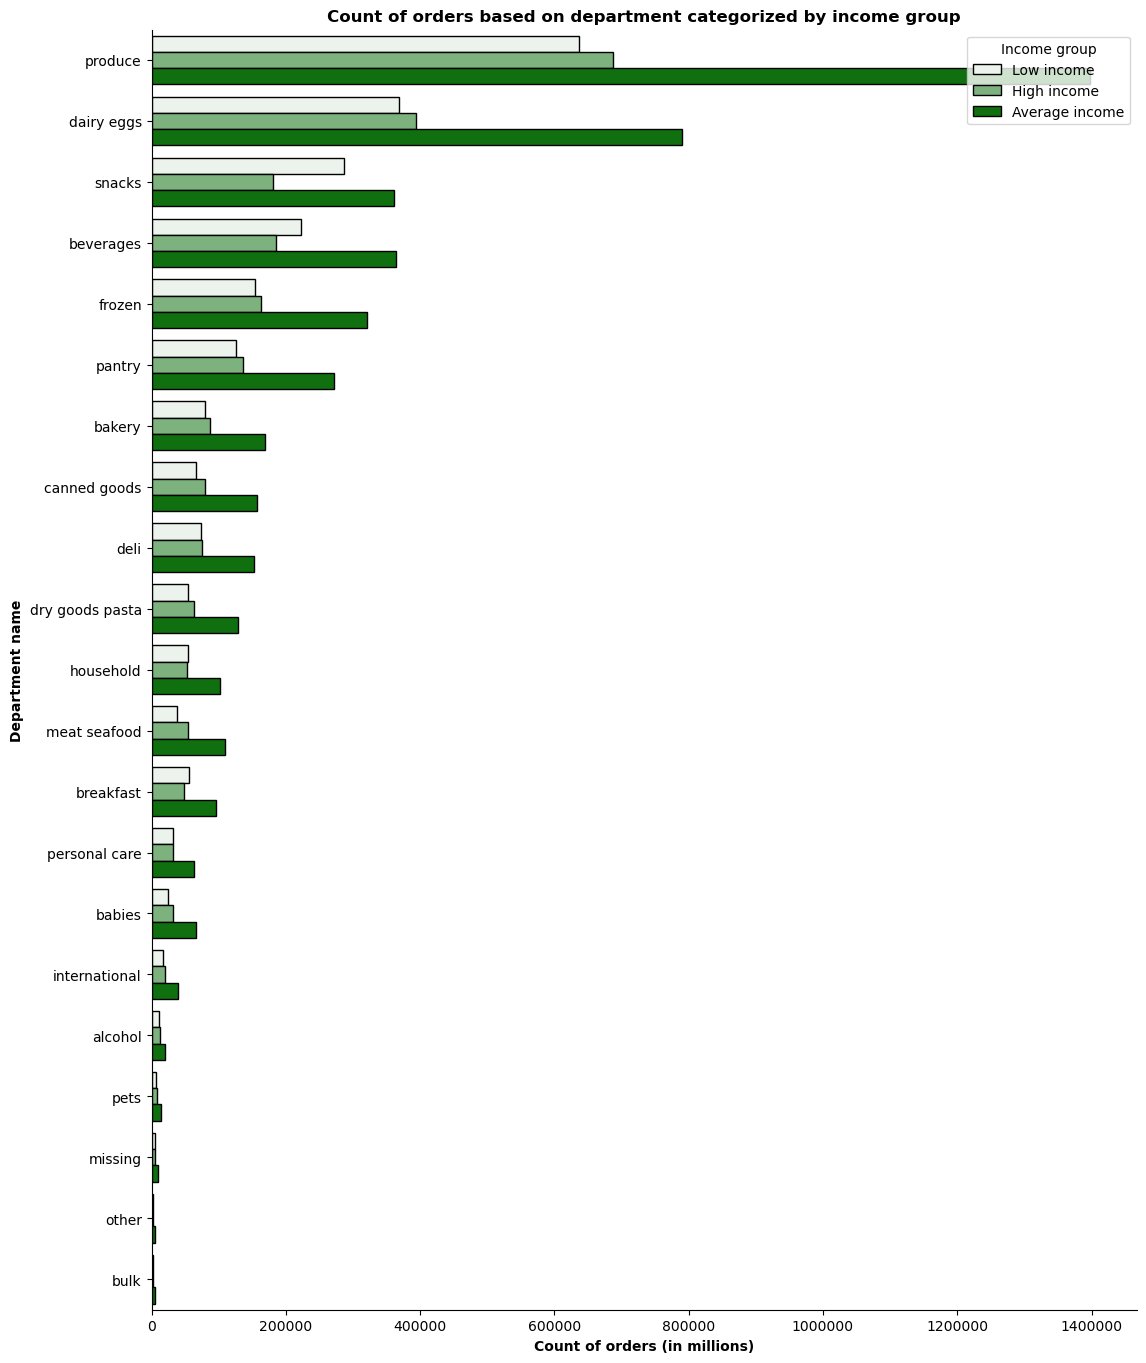

In [40]:
# Creating bar plot of department categorized by income group

g31 = sns.catplot(data = df_high, kind = 'count', y = 'department_name', order = df_high['department_name'].value_counts().index,ci = False, orient = 'h', hue = 'income_flag',hue_order = df_high['income_flag'].value_counts().sort_values().index,color = 'green', edgecolor = 'black', legend = False)
plt.title('Count of orders based on department categorized by income group', fontweight = 'bold');
plt.ylabel('Department name', fontweight = 'bold');
plt.xlabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.legend(title = 'Income group', loc = 'upper right');
g31.fig.set_figwidth(15);
g31.fig.set_figheight(15);

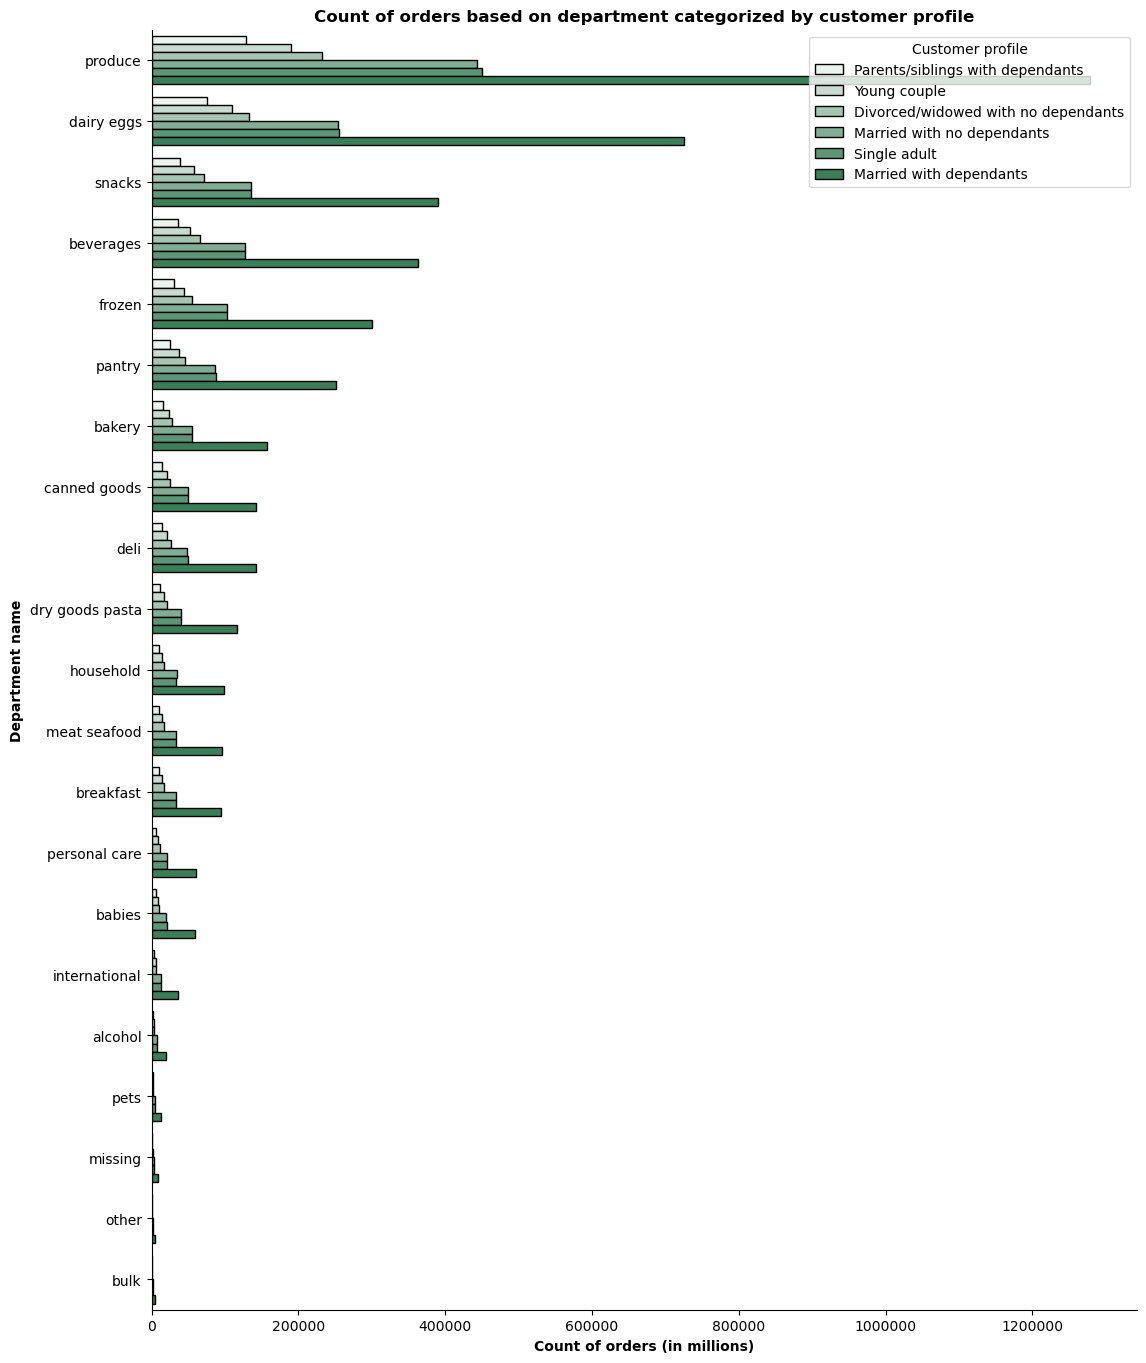

In [41]:
# Creating bar plot of department categorized by customer profile

g32 = sns.catplot(data = df_high, kind = 'count', y = 'department_name', order = df_high['department_name'].value_counts().index,ci = False, orient = 'h', hue = 'profile_fam',hue_order = df_high['profile_fam'].value_counts().sort_values().index,color = 'seagreen', edgecolor = 'black', legend = False)
plt.title('Count of orders based on department categorized by customer profile', fontweight = 'bold');
plt.ylabel('Department name', fontweight = 'bold');
plt.xlabel ('Count of orders (in millions)', fontweight = 'bold');
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.legend(title = 'Customer profile', loc = 'upper right');
g32.fig.set_figwidth(15);
g32.fig.set_figheight(15);

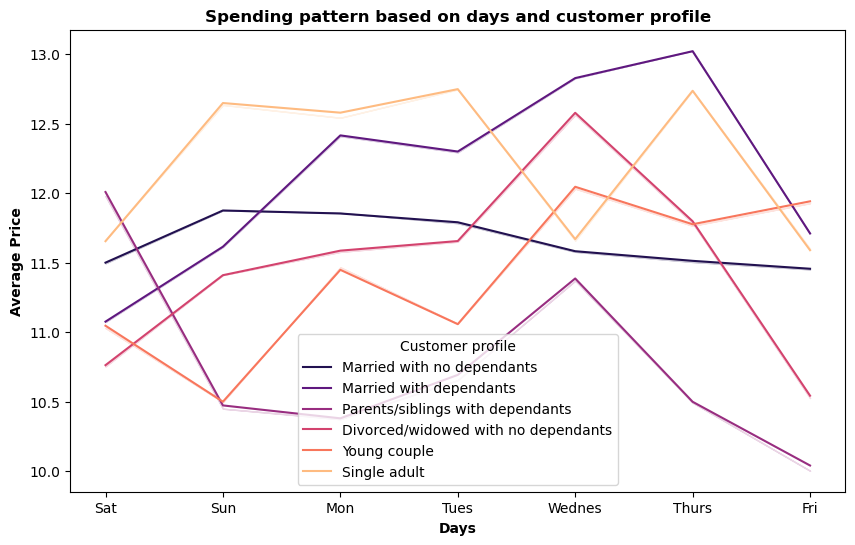

In [42]:
# Creating line chart on avg_price, customer profile and order day of week
plt.figure(figsize = (10,6));
g33 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'profile_fam', data = df_high, ci = False, palette = 'magma')
plt.title('Spending pattern based on days and customer profile', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Customer profile');

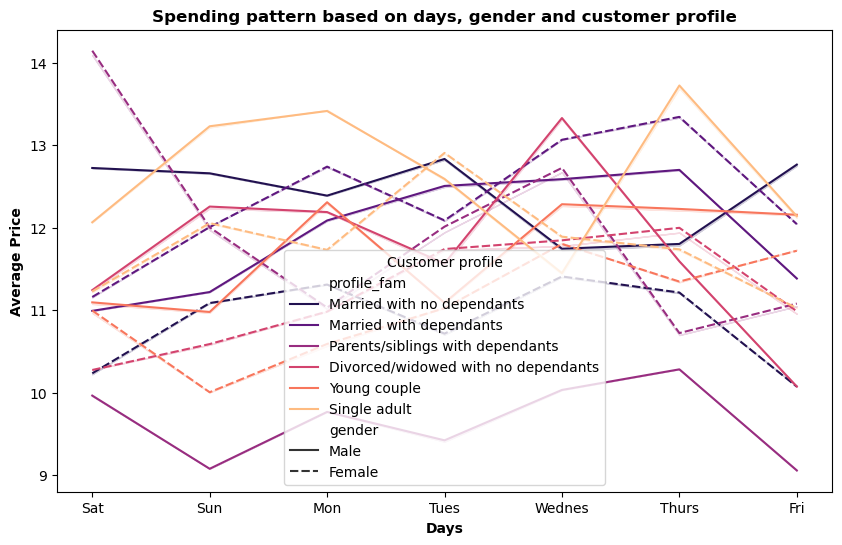

In [43]:
# Creating line chart on avg_price, gender, customer profile and order day of week
plt.figure(figsize = (10,6));
g34 = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'profile_fam', style = 'gender', data = df_high, ci = False, palette = 'magma')
plt.title('Spending pattern based on days, gender and customer profile', fontweight = 'bold');
plt.xlabel('Days', fontweight = 'bold');
plt.ylabel ('Average Price', fontweight = 'bold');
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.xticks([0,1,2,3,4,5,6],['Sat','Sun','Mon', 'Tues', 'Wednes','Thurs','Fri']);
plt.legend(title = 'Customer profile');

## 4. Export the visualizations

In [47]:
#Export the visualization - 1

g1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_order.png'))

In [48]:
#Export the visualization - 2

g2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept_order.png'))

In [49]:
#Export the visualization - 3

g3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_age_group.png'))

In [50]:
#Export the visualization - 4

g4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_income_group.png'))

In [51]:
#Export the visualization - 5

g5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_loyalty.png'))

In [52]:
#Export the visualization - 6

g6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_order_freq.png'))

In [53]:
#Export the visualization - 7

g7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_price_range.png'))

In [54]:
#Export the visualization - 8

g8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_region.png'))

In [55]:
#Export the visualization - 9

g9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_dept.png'))

In [56]:
#Export the visualization - 10

g10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_profile.png'))

In [57]:
#Export the visualization - 11

g11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_age_price.png'))

In [58]:
#Export the visualization - 12

g12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_income_price.png'))

In [59]:
#Export the visualization - 13

g13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_income_price_gender.png'))

In [60]:
#Export the visualization - 14

g14.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_age_price_gender.png'))

In [61]:
#Export the visualization - 15

g15.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_price_loyalty.png'))

In [62]:
#Export the visualization - 16

g16.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_price_loyalty_gender.png'))

In [63]:
#Export the visualization - 17

g17.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_price_freq.png'))

In [64]:
#Export the visualization - 18

g18.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_price_freq_gender.png'))

In [65]:
#Export the visualization - 19

g19.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_price_time.png'))

In [66]:
#Export the visualization - 20

g20.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_time_gender.png'))

In [67]:
#Export the visualization - 21

g21.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_price_gender_region.png'))

In [68]:
#Export the visualization - 22

g22.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_price_region.png'))

In [69]:
#Export the visualization - 23

g23.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_dist.png'))

In [70]:
#Export the visualization - 24

g24.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Time_dist.png'))

In [71]:
#Export the visualization - 25

g26.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_dist.png'))

In [72]:
#Export the visualization - 26

g27.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Box_prices.png'))

In [73]:
#Export the visualization - 27

g28.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Box_income.png'))

In [74]:
#Export the visualization - 28

g29.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept_time.png'))

In [75]:
#Export the visualization - 29

g30.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept_age.png'))

In [76]:
#Export the visualization - 30

g31.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept_income.png'))

In [77]:
#Export the visualization - 31

g32.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept_profile.png'))

In [78]:
#Export the visualization - 32

g33.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_price_profile.png'))

In [79]:
#Export the visualization - 33

g34.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_gender_profile.png'))